### Problem statement:where a startup copany should invest to be more profitable-given factor R&D ,Administraion,Location

In [21]:
##import pacakages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
##Iport the Dataset
df= pd.read_csv('datasets/datasets/50_Startups.csv')

In [23]:
df.shape

(50, 5)

In [24]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [25]:
x=df.iloc[:,:-1]
y=df.iloc[:,4]

In [26]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [27]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

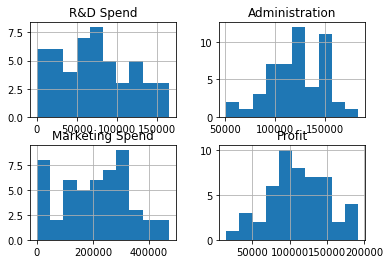

In [28]:
df.hist()
plt.show()

In [29]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


C:\Users\Hrishikesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Administration', ylabel='Profit'>

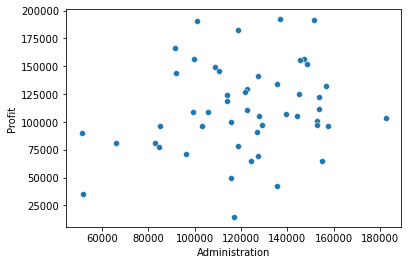

In [32]:
sns.scatterplot(x['Administration'],y)

In [37]:
np.corrcoef(x['Administration'],y) [0,1]

0.20071656826872128

C:\Users\Hrishikesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

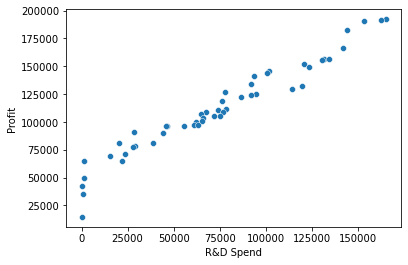

In [33]:
sns.scatterplot(x['R&D Spend'],y)

In [35]:
np.corrcoef(x['R&D Spend'],y) [0,1]

0.9729004656594832

C:\Users\Hrishikesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

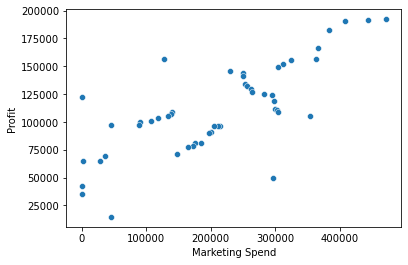

In [34]:
sns.scatterplot(x['Marketing Spend'],y)

In [36]:
np.corrcoef(x['Marketing Spend'],y) [0,1]

0.7477657217414767

<AxesSubplot:xlabel='State', ylabel='Profit'>

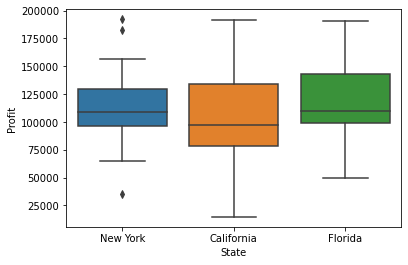

In [38]:
sns.boxplot(data=df,x='State',y='Profit')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<AxesSubplot:>

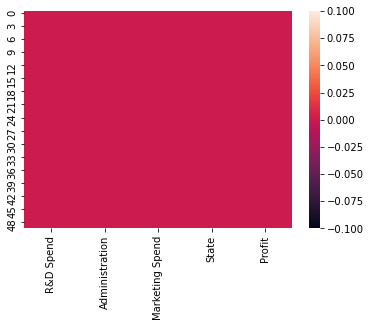

In [40]:
sns.heatmap(pd.isnull(df))

In [41]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [42]:
pd.unique(x['State'])

array(['New York', 'California', 'Florida'], dtype=object)

In [45]:
## Ctegorical Encoding

x_state= pd.get_dummies(x['State'],drop_first=True)
x_state.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [48]:
x.drop('State',axis=1,inplace=True)

In [49]:
x.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [50]:
x_data=pd.concat([x,x_state],axis=1)
x_data.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [51]:
## Splitting theDtaset into traing set and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y,test_size=.2)

In [52]:
len(x_train),len(x_test)

(40, 10)

## Model Creation

In [53]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [54]:
y_train_pred=model.predict(x_train)

In [56]:
model.score(x_train,y_train)

0.953998651357165

In [57]:
model.score(x_test,y_test)

0.9349719572089799